C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars


-0.12499999529382533


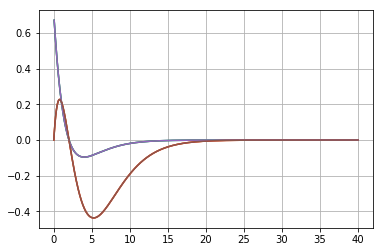

In [3]:

import matplotlib.pyplot as plt 

"""
   Z = 1, hydrogen atom
   -1/2 U'' + (-Z/r + l(l+1)/2*r^2)U = E*U, where U(r) = r*Psi(r)

"""


""" Coulomb Potential  """
def V(r):
    if r==0:
        return 1.0
    else :
        return -Z/r

""" Centripetal Potential"""
def Vcent(r):
    if r==0:
        return 1.0
    else :
        return l*(l+1)/(2.0*r**2)

Z = 1.0
l = 0.0

n    = 800
rmax = 40

r = np.linspace(0,rmax,n)

r = r[::-1] # we start from rmax coming down to zero

"""
U = r*Psi

U'   = Q
Q'   = -2*(E - V(r)-Vcent)*U

U(rmax)   = 0
U(rmax-h) = 1e-4  Q' = r*Psi' + Psi --> Q' = U(rmax-h)/h

"""

h = np.abs(r[1]-r[0])
Uinf = 0.0
Qinf = 1e-6/h


iniValue = [Uinf,Qinf]

def bound(inVal,r,E):     
    U,Q = inVal
    return [Q, -2*(E - V(r)-Vcent(r))*U ]


def shoot(E):
  sol = odeint(bound,iniValue, r, args=(E,))
  t   = sol[:,0]
  return  t[-1]/max(np.abs(t))
 

#En = brentq(shoot,-1,-0.4)
En = brentq(shoot,-0.2,-0.1)
print(En)



sol = odeint(bound, iniValue, r, args=(En,))

Ur = sol[:,0]

NormFact  = simps(Ur**2,dx=h)

Ur = Ur/np.sqrt(NormFact)

psi = [Ur[i]/r[i] for i in range(len(r))]

#psi[0]=0
plt.plot(r,psi)
plt.plot(r,Ur)
plt.grid()
plt.show()

         